# Logistic Regression

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

class LogisticRegression():
    
    
    def __init__(self, num_iterations=1000, learning_rate=0.01):
        """
        Initialize the parameters of LR model
        
        Arguments:
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        
        """
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        
        return None
    
    
    def sigmoid(self, x):
        """
        Compute the sigmoid of x

        Argument:
        x -- A scalar or numpy array of any size

        Return:
        s -- sigmoid(x)
        
        """ 
        s = 1.0 / (1+np.exp(-x))
    
        return s
    
    
    def propagate(self, X, Y):
        """
        Implement the cost function and its gradient for the propagation explained above

        Arguments:
        X -- data with the shape of [n_samples, n_features]
        Y -- true "label" vector with the shape of [n_samples, 1] 

        Returns:
        cost -- negative log-likelihood cost for logistic regression
        dw -- gradient of the loss with respect to w, thus same shape as w
        db -- gradient of the loss with respect to b, thus same shape as b
    
        """        
        m = X.shape[1]
        # Forward propagation(from x_train to cost)
        A = self.sigmoid(np.dot(X, self.w) + self.b).T
        cost = np.sum( - np.dot(np.log(A), Y) - np.dot(np.log(1-A), 1-Y)) / m
        # Backward propagation(to calculate gradient)
        dw = np.dot(A-Y, X) / m
        db = np.sum(A-Y) / m
        
        grads = {'dw':dw, 
                 'db':db}
        
        return grads, cost        

        
    def optimize(self, X, Y, print_cost=False):
        """
        This function optimizes w and b by running a gradient descent algorithm
    
        Arguments:
        X -- data with the shape of [n_samples, n_features]
        Y -- true "label" vector with the shape of [n_samples, 1]
        print_cost -- True to print the loss every 100 steps
    
        Return:
        costs -- list of all the costs computed during the optimization
    
        """        
        # Initialize the weights and bias 
        dim = X.shape[1]
        self.w = np.zeros([dim,1])
        self.b = 0
        
        # Begin to iterate
        costs = []
        for i in range(self.num_iterations):
            # Gradient and cost calculation
            grads, cost = self.propagate(X,Y)
            
            # Retrive derivatives from grads
            dw = grads['dw']
            db = grads['db']
            
            # Update rule
            self.w = self.w - self.learning_rate * dw.T
            self.b = self.b - self.learning_rate * db
            
            # Record the costs
            if i%1000 == 0:
                costs.append(cost)
            # Print the cost every 100 iterations
            if print_cost and i%1000 == 0:
                print('Cost after iteration %i: %f' %(i, cost))
                
        return costs
    
    
    def predict(self, X):
        """
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
        Argument:
        X -- data with the shape of [n_samples, n_features]
    
        Return:
        Y_predictions -- a numpy array (vector) containing all predictions (0/1) for the examples in X
        
        """
        # Compute vector "A"  that are the values of activation functions of wx+b
        A = self.sigmoid(np.dot(x, self.w) + b)
        Y_predictions = []
        for i in range(len(A)):
            if i <= 0.5:
                Y_predictions.append(0)
            else:
                Y_predictions.append(1)
        
        return np.array(Y_predictions)
    
    
    def fit(self, X_train, Y_train, print_cost=True, draw_costs_curve=True):
        """
        Fit the training dataset and print costs
        
        Arguments:
        X -- data with the shape of [n_samples, n_features]
        Y -- true "label" vector with the shape of [n_samples, 1]
        print_cost -- True to print the loss every 100 steps
        draw_costs_curve -- True to draw the loos every 100 steps
        
        """
        # Training the data with gradient descent
        costs = self.optimize(X_train, Y_train, print_cost)
        # Whether need to draa the loss curve
        if draw_costs_curve == True:
            plt.plot(costs)
            plt.ylabel('loss')
            plt.xlabel('unit per 100 iterations')
            plt.title('Loss trend of training data')
            
        return None
        

### Test

#### generate artificial samples

In [10]:
x = np.array([[3,3], [4,3], [1,2.5], [0.5,0.5], [2,2], [1,5], [2.5,1.5], [3.5,2.5], [1.5,3], [1.5,2], 
              [1.0,4.5], [2,4.5], [3,4.5],[0.7,3.7], [3,2]])
y = np.array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,0, 0 ])

#### training model

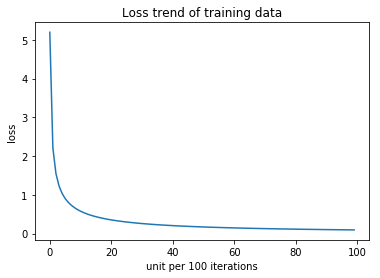

In [12]:
model = LogisticRegression(num_iterations=100000)
model.fit(x,y, print_cost=False)

#### Visualization

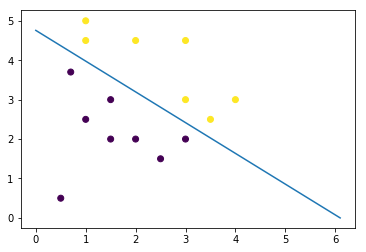

In [13]:
# 计算超平面与坐标轴的交点
x1_1 = - model.b / model.w[0]
x2_1 = - model.b / model.w[1]
# 可视化超平面与训练数据的关系
fig_1 = plt.scatter(x[:,0], x[:,1], c=y)
fig_1 = plt.plot([0,x1_1], [x2_1,0])